In [47]:
import pandas as pd
import numpy as np
import scipy.stats
import scikit_posthocs

import seaborn as sns
sns.set(rc={'figure.figsize':[12,8]})

df = pd.read_pickle('STING_DB.pkl')

df.head()

n_patient           id label  array  n_cores          sp    sp_date  turb  \
0          1  19870070301    OO    935      1.0   05-S-9869 2005-12-07     4   
1          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
2          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
3          1  19870070301    OO    931      3.0  07-S-11432 2007-11-14     5   
4          1  19870070301    OO    931      3.0   05-S-4662 2005-06-10     3   

   histo      lesion  ... bcg_date mitomycin progression_stage_any  \
0      4   Non-tumor  ...      NaT         0                    No   
1      1   Low-grade  ...      NaT         0                    No   
2      1   Low-grade  ...      NaT         0                    No   
3      1   Low-grade  ...      NaT         0                    No   
4      2  High-grade  ...      NaT         0                    No   

  progression_stage_next recurrence_any  recurrence_next  \
0                    Yes            Yes              Yes   
1                     No            Yes               No   
2                     No            Yes               No   
3                     No            Yes               No   
4                     No            Yes               No   

   progression_grade_any  progression_grade_next   fu_months  sp_bcg_timing  
0                     No                     Yes  270.933333            Pre  
1                     No                      No  270.933333            Pre  
2                     No                      No  270.933333            Pre  
3                     No                      No  270.933333            Pre  
4                     No                      No  270.933333            Pre  

[5 rows x 64 columns]

In [50]:
df.groupby('id')['bcg'].unique().value_counts()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[No]     42
[Yes]    19
Name: bcg, dtype: int64

# Patients with BCG treatment


In [2]:
## Selecting cases with BCG treatment
df_bcg = df.query('bcg == "Yes"')
df_bcg = df_bcg.astype({'sp_bcg_timing':'category'})
df_bcg['sp_bcg_timing'].cat.reorder_categories(['Pre','Post'], ordered=True, inplace=True)

## STING in tumor cells

In [3]:
marker = 'sting_tumor'
tbl = df_bcg.groupby(['sp','sp_bcg_timing'])[marker].median().reset_index()
tbl.groupby('sp_bcg_timing')[marker].describe()

count       mean        std  min   25%   50%   75%    max
sp_bcg_timing                                                           
Pre             16.0  19.062500  33.277558  0.0  0.00   0.0  17.5  100.0
Post            14.0  24.642857  31.772284  0.0  1.25  10.0  35.0   80.0

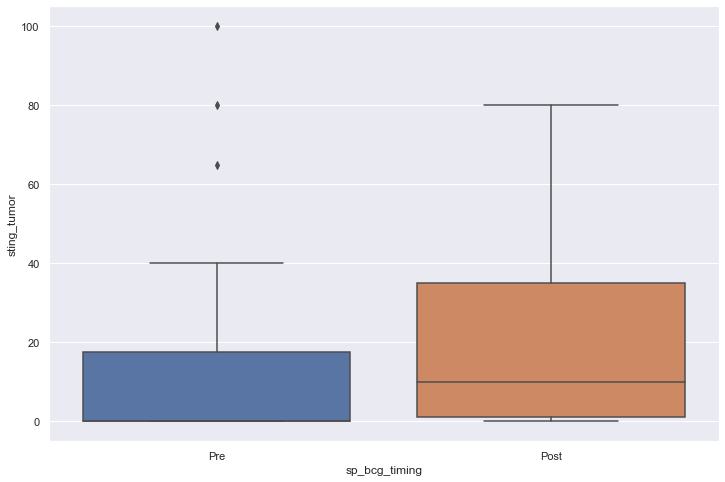

In [4]:
g = sns.boxplot(x='sp_bcg_timing', y=marker, data=tbl)

In [5]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in df_bcg.groupby('sp_bcg_timing')])[1]
print('P value = {:.1e}'.format(p))

P value = 1.2e-02


## STING in peritumoral lymphocytes

In [6]:
marker = 'sting_inflammatory'
tbl = df_bcg.groupby(['sp','sp_bcg_timing'])[marker].median().reset_index()
tbl.groupby('sp_bcg_timing')[marker].describe()

count        mean       std    min    25%    50%    75%    max
sp_bcg_timing                                                                
Pre             12.0   98.333333  3.892495   90.0  100.0  100.0  100.0  100.0
Post            11.0  100.000000  0.000000  100.0  100.0  100.0  100.0  100.0

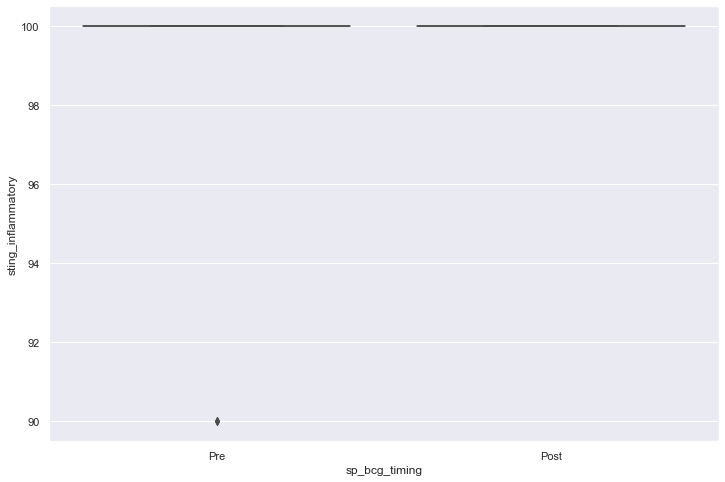

In [7]:
g = sns.boxplot(x='sp_bcg_timing', y=marker, data=tbl)

In [8]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in df_bcg.groupby('sp_bcg_timing')])[1]
print('P value = {:.1e}'.format(p))

P value = 6.4e-03


## cGAS in tumor cells

In [9]:
marker = 'cgas_tumor'
tbl = df_bcg.groupby(['sp','sp_bcg_timing'])[marker].median().reset_index()
tbl.groupby('sp_bcg_timing')[marker].describe()

count       mean        std   min    25%   50%    75%    max
sp_bcg_timing                                                              
Pre             16.0  79.375000  31.084562  10.0  80.00  90.0  100.0  100.0
Post            14.0  53.214286  41.119298   0.0  11.25  65.0   87.5  100.0

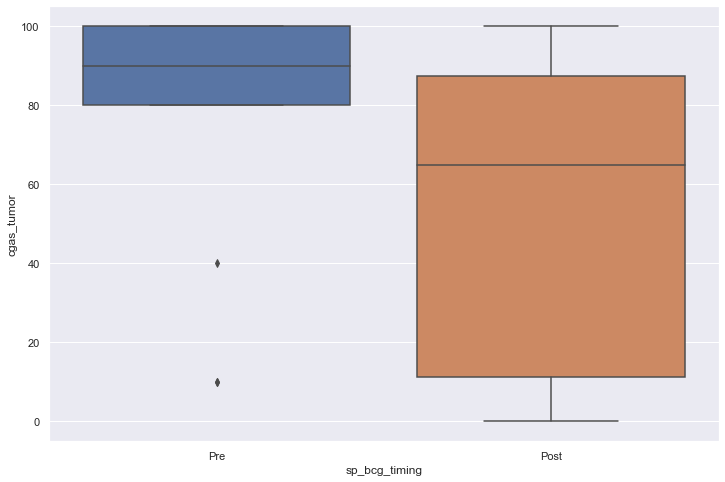

In [10]:
g = sns.boxplot(x='sp_bcg_timing', y=marker, data=tbl)

In [11]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in df_bcg.groupby('sp_bcg_timing')])[1]
print('P value = {:.1e}'.format(p))

P value = 1.2e-01


## cGAS in peritumoral lymphocytes

In [12]:
marker = 'cgas_inflammatory'
tbl = df_bcg.groupby(['sp','sp_bcg_timing'])[marker].median().reset_index()
tbl.groupby('sp_bcg_timing')[marker].describe()

count       mean        std  min  25%   50%   75%   max
sp_bcg_timing                                                         
Pre             12.0   6.041667   9.425445  0.0  0.0   1.5  10.0  30.0
Post            11.0  14.272727  13.921860  0.0  3.5  10.0  22.5  40.0

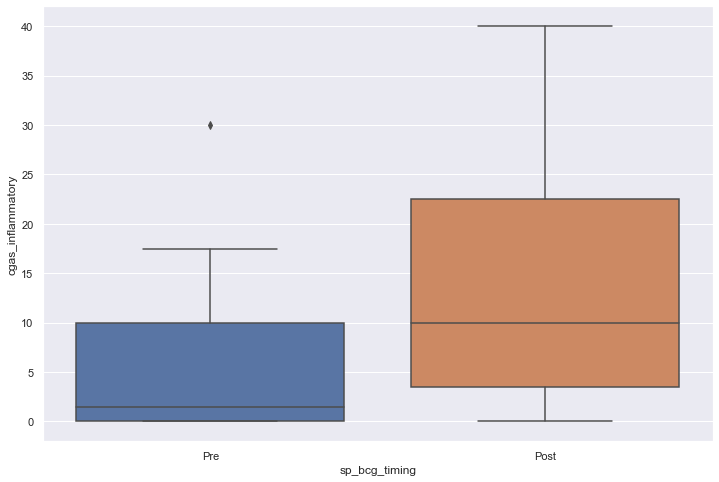

In [13]:
g = sns.boxplot(x='sp_bcg_timing', y=marker, data=tbl)

In [14]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in df_bcg.groupby('sp_bcg_timing')])[1]
print('P value = {:.1e}'.format(p))

P value = 1.6e-02


## pIRF3 in tumor cells

In [15]:
marker = 'pirf3_tumor'
tbl = df_bcg.groupby(['sp','sp_bcg_timing'])[marker].median().reset_index()
tbl.groupby('sp_bcg_timing')[marker].describe()

count       mean        std  min  25%  50%    75%    max
sp_bcg_timing                                                          
Pre             16.0  21.875000  37.941841  0.0  0.0  0.0  23.75  100.0
Post            14.0   3.642857  10.616440  0.0  0.0  0.0   0.75   40.0

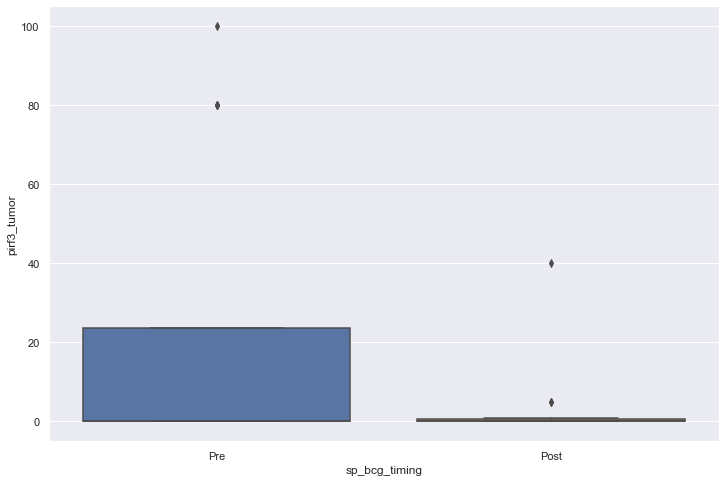

In [16]:
g = sns.boxplot(x='sp_bcg_timing', y=marker, data=tbl)

In [17]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in df_bcg.groupby('sp_bcg_timing')])[1]
print('P value = {:.1e}'.format(p))

P value = 3.0e-02


## pIRF3 in peritumoral lymphocytes

In [18]:
marker = 'pirf3_inflammatory'
tbl = df_bcg.groupby(['sp','sp_bcg_timing'])[marker].median().reset_index()
tbl.groupby('sp_bcg_timing')[marker].describe()

count       mean        std  min  25%  50%    75%   max
sp_bcg_timing                                                         
Pre             12.0   1.916667   4.378840  0.0  0.0  0.0   1.25  15.0
Post            11.0  20.000000  29.090376  0.0  0.0  0.0  31.25  90.0

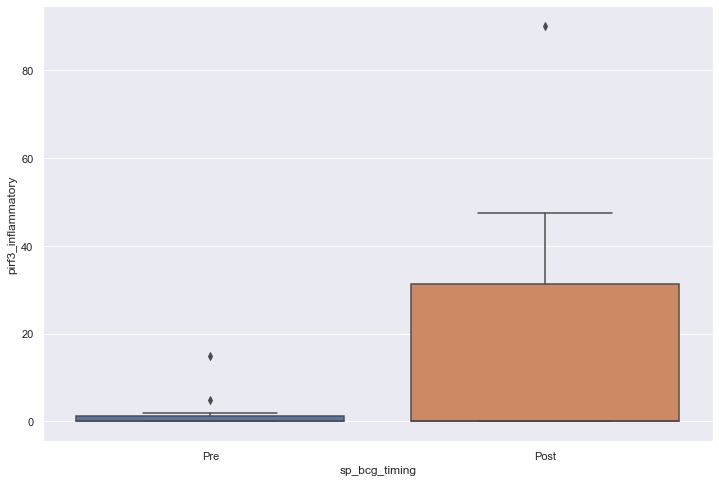

In [19]:
g = sns.boxplot(x='sp_bcg_timing', y=marker, data=tbl)

In [20]:
# P value (Mann-Whitney U test)
p = scipy.stats.mannwhitneyu(*[data[marker].values for name, data in df_bcg.groupby('sp_bcg_timing')])[1]
print('P value = {:.1e}'.format(p))

P value = 1.1e-02


# Patients without BCG treatment

In [21]:
df_no_bcg = df.query('bcg == "No"')
turb_seq = df_no_bcg.groupby('sp').cumcount()+1
turb_seq = turb_seq.tolist()
df_no_bcg.insert(loc=1, column='turb_seq', value=turb_seq)

In [22]:
df_no_bcg.head()

n_patient  turb_seq           id label  array  n_cores          sp  \
0          1         1  19870070301    OO    935      1.0   05-S-9869   
1          1         1  19870070301    OO    931      3.0  07-S-11432   
2          1         2  19870070301    OO    931      3.0  07-S-11432   
3          1         3  19870070301    OO    931      3.0  07-S-11432   
4          1         1  19870070301    OO    931      3.0   05-S-4662   

     sp_date  turb  histo  ... bcg_date mitomycin progression_stage_any  \
0 2005-12-07     4      4  ...      NaT         0                    No   
1 2007-11-14     5      1  ...      NaT         0                    No   
2 2007-11-14     5      1  ...      NaT         0                    No   
3 2007-11-14     5      1  ...      NaT         0                    No   
4 2005-06-10     3      2  ...      NaT         0                    No   

  progression_stage_next recurrence_any recurrence_next  \
0                    Yes            Yes             Yes   
1                     No            Yes              No   
2                     No            Yes              No   
3                     No            Yes              No   
4                     No            Yes              No   

   progression_grade_any  progression_grade_next   fu_months  sp_bcg_timing  
0                     No                     Yes  270.933333            Pre  
1                     No                      No  270.933333            Pre  
2                     No                      No  270.933333            Pre  
3                     No                      No  270.933333            Pre  
4                     No                      No  270.933333            Pre  

[5 rows x 65 columns]

## STING in tumor cells

In [23]:
marker = 'sting_tumor'
tbl = df_no_bcg.groupby(['sp','turb_seq'])[marker].median().reset_index()
tbl.groupby('turb_seq')[marker].describe()

count       mean        std  min  25%   50%   75%    max
turb_seq                                                          
1          64.0  30.937500  38.861527  0.0  0.0  10.0  65.0  100.0
2          53.0  27.735849  34.732024  0.0  0.0  10.0  50.0  100.0
3          49.0  24.489796  33.792333  0.0  0.0  10.0  30.0  100.0
4          14.0  18.571429  28.784917  0.0  0.0  10.0  20.0  100.0
5          12.0  16.666667  32.844906  0.0  0.0   0.0  10.0  100.0
6          15.0  20.000000  28.535692  0.0  0.0  10.0  20.0   90.0

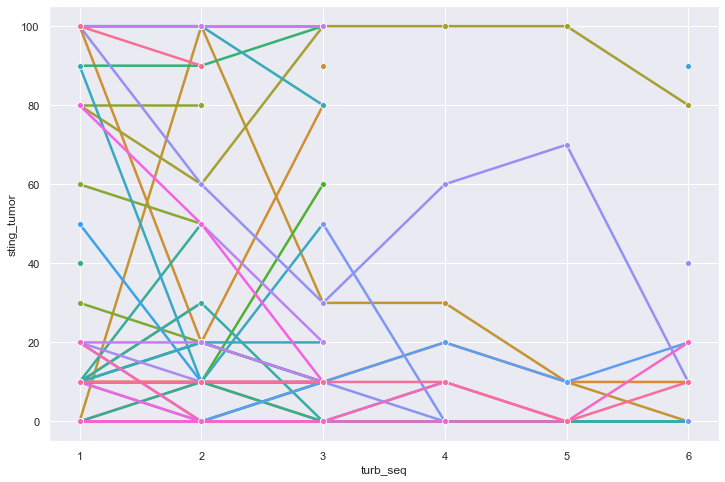

In [24]:
g = sns.lineplot(x='turb_seq', y=marker, hue='sp', data=df_no_bcg, legend=False, marker='o', linewidth=2.5)

In [25]:
# P value (Kruskal-Wallis test)
p = scipy.stats.kruskal(*[data[marker].values for name, data in df_no_bcg.groupby('turb_seq')], nan_policy='omit')[1]
print('P value = {:.1e}'.format(p))

P value = 6.5e-01


In [26]:
# Dunn's posthoc test
dunn = scikit_posthocs.posthoc_dunn([data[marker].values for name, data in df_no_bcg.groupby('turb_seq')]).round(5)
pd.DataFrame(np.array(dunn))

0        1        2        3        4        5
0  1.00000  0.96549  0.77472  0.60181  0.27422  0.72570
1  0.96549  1.00000  0.81530  0.62725  0.29336  0.75150
2  0.77472  0.81530  1.00000  0.74235  0.36853  0.87527
3  0.60181  0.62725  0.74235  1.00000  0.62911  0.88594
4  0.27422  0.29336  0.36853  0.62911  1.00000  0.52986
5  0.72570  0.75150  0.87527  0.88594  0.52986  1.00000

## STING in peritumoral lymphocytes

In [27]:
marker = 'sting_inflammatory'
tbl = df_no_bcg.groupby(['sp','turb_seq'])[marker].median().reset_index()
tbl.groupby('turb_seq')[marker].describe()

count       mean        std   min    25%    50%    75%    max
turb_seq                                                               
1          36.0  92.916667  23.310788   0.0  100.0  100.0  100.0  100.0
2          27.0  89.814815  26.763978   0.0  100.0  100.0  100.0  100.0
3          28.0  94.285714  19.518001   0.0  100.0  100.0  100.0  100.0
4          10.0  94.000000   9.660918  80.0   85.0  100.0  100.0  100.0
5           8.0  97.500000   7.071068  80.0  100.0  100.0  100.0  100.0
6           6.0  96.666667   8.164966  80.0  100.0  100.0  100.0  100.0

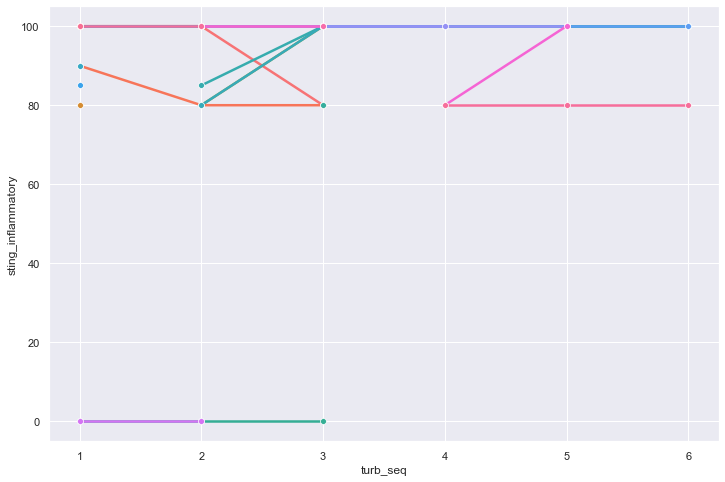

In [28]:
g = sns.lineplot(x='turb_seq', y=marker, hue='sp', data=df_no_bcg, legend=False, marker='o', linewidth=2.5)

In [29]:
# P value (Kruskal-Wallis test)
p = scipy.stats.kruskal(*[data[marker].values for name, data in df_no_bcg.groupby('turb_seq')], nan_policy='omit')[1]
print('P value = {:.1e}'.format(p))

P value = 8.8e-01


In [30]:
# Dunn's posthoc test
dunn = scikit_posthocs.posthoc_dunn([data[marker].values for name, data in df_no_bcg.groupby('turb_seq')]).round(5)
pd.DataFrame(np.array(dunn))

0        1        2        3        4        5
0  1.00000  0.86413  0.96950  0.79981  0.94911  0.99534
1  0.86413  1.00000  0.84365  0.89879  0.86485  0.92764
2  0.96950  0.84365  1.00000  0.78546  0.96953  0.97835
3  0.79981  0.89879  0.78546  1.00000  0.80747  0.86458
4  0.94911  0.86485  0.96953  0.80747  1.00000  0.95936
5  0.99534  0.92764  0.97835  0.86458  0.95936  1.00000

## cGAS in tumor cells

In [31]:
marker = 'cgas_tumor'
tbl = df_no_bcg.groupby(['sp','turb_seq'])[marker].median().reset_index()
tbl.groupby('turb_seq')[marker].describe()

count       mean        std  min    25%   50%    75%    max
turb_seq                                                             
1          65.0  62.000000  40.934399  0.0  20.00  80.0  100.0  100.0
2          54.0  62.037037  42.443286  0.0  10.00  90.0  100.0  100.0
3          50.0  67.300000  38.001208  0.0  40.00  85.0  100.0  100.0
4          14.0  63.214286  44.272198  0.0  13.75  90.0  100.0  100.0
5          12.0  71.666667  40.414519  0.0  55.00  95.0  100.0  100.0
6          15.0  60.666667  35.145954  0.0  30.00  60.0   90.0  100.0

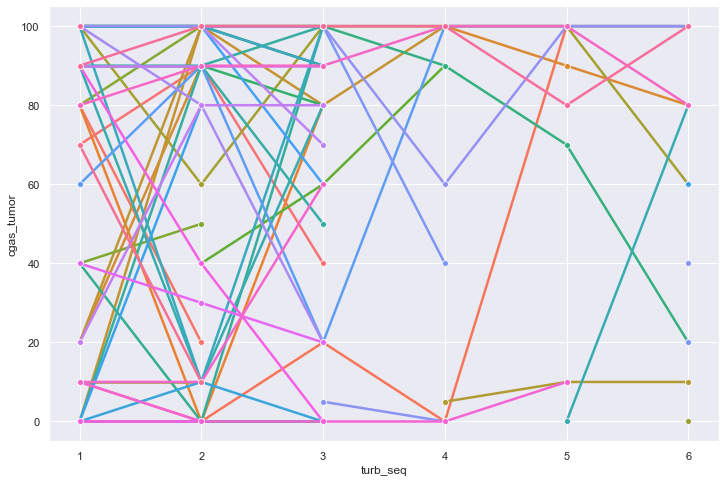

In [32]:
g = sns.lineplot(x='turb_seq', y=marker, hue='sp', data=df_no_bcg, legend=False, marker='o', linewidth=2.5)

In [33]:
# P value (Kruskal-Wallis test)
p = scipy.stats.kruskal(*[data[marker].values for name, data in df_no_bcg.groupby('turb_seq')], nan_policy='omit')[1]
print('P value = {:.1e}'.format(p))

P value = 9.4e-01


In [34]:
# Dunn's posthoc test
dunn = scikit_posthocs.posthoc_dunn([data[marker].values for name, data in df_no_bcg.groupby('turb_seq')]).round(5)
pd.DataFrame(np.array(dunn))

0        1        2        3        4        5
0  1.00000  0.97357  0.74230  0.89286  0.55914  0.79210
1  0.97357  1.00000  0.77636  0.91084  0.57824  0.77979
2  0.74230  0.77636  1.00000  0.94155  0.70505  0.64080
3  0.89286  0.91084  0.94155  1.00000  0.71463  0.75659
4  0.55914  0.57824  0.70505  0.71463  1.00000  0.50361
5  0.79210  0.77979  0.64080  0.75659  0.50361  1.00000

## cGAS in peritumoral lymphocytes

In [35]:
marker = 'cgas_inflammatory'
tbl = df_no_bcg.groupby(['sp','turb_seq'])[marker].median().reset_index()
tbl.groupby('turb_seq')[marker].describe()

count       mean        std  min   25%   50%   75%   max
turb_seq                                                          
1          35.0  11.000000  17.383224  0.0  0.00   5.0  10.0  80.0
2          26.0  12.653846  16.737843  0.0  0.00   3.5  27.5  60.0
3          27.0  10.703704  15.965865  0.0  0.00   5.0  10.0  60.0
4          10.0  15.700000  23.720830  0.0  2.75  10.0  17.5  80.0
5           8.0  13.125000  20.166716  0.0  0.00   7.5  12.5  60.0
6           6.0   7.500000   7.582875  0.0  1.25   7.5  10.0  20.0

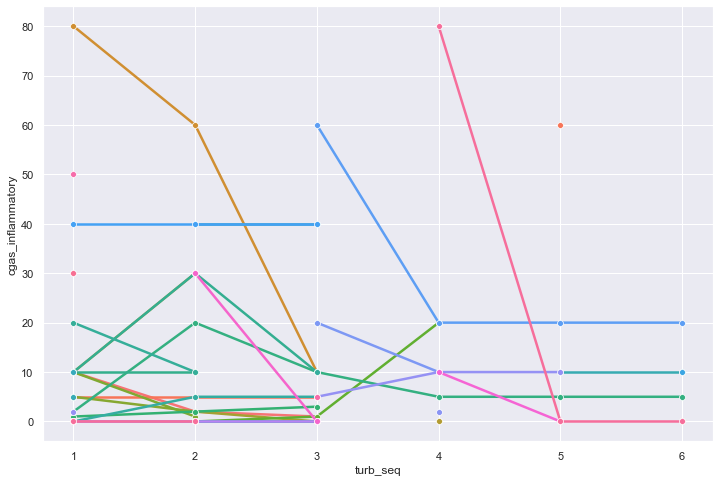

In [36]:
g = sns.lineplot(x='turb_seq', y=marker, hue='sp', data=df_no_bcg, legend=False, marker='o', linewidth=2.5)

In [37]:
# P value (Kruskal-Wallis test)
p = scipy.stats.kruskal(*[data[marker].values for name, data in df_no_bcg.groupby('turb_seq')], nan_policy='omit')[1]
print('P value = {:.1e}'.format(p))

P value = 9.6e-01


In [38]:
# Dunn's posthoc test
dunn = scikit_posthocs.posthoc_dunn([data[marker].values for name, data in df_no_bcg.groupby('turb_seq')]).round(5)
pd.DataFrame(np.array(dunn))

0        1        2        3        4        5
0  1.00000  0.87919  0.96590  0.72287  0.92268  0.97431
1  0.87919  1.00000  0.91767  0.81345  0.99740  0.95576
2  0.96590  0.91767  1.00000  0.75358  0.94635  0.99420
3  0.72287  0.81345  0.75358  1.00000  0.85096  0.82689
4  0.92268  0.99740  0.94635  0.85096  1.00000  0.96484
5  0.97431  0.95576  0.99420  0.82689  0.96484  1.00000

## pIRF3 in tumor cells

In [39]:
marker = 'pirf3_tumor'
tbl = df_no_bcg.groupby(['sp','turb_seq'])[marker].median().reset_index()
tbl.groupby('turb_seq')[marker].describe()

count       mean        std  min  25%  50%    75%   max
turb_seq                                                         
1          64.0  15.375000  28.806690  0.0  0.0  0.0  12.50  95.0
2          53.0   9.528302  20.991394  0.0  0.0  0.0   5.00  80.0
3          49.0  13.408163  25.848048  0.0  0.0  0.0  10.00  90.0
4          14.0   6.785714  16.362145  0.0  0.0  0.0   3.75  60.0
5          12.0  13.916667  24.035800  0.0  0.0  3.5  16.25  80.0
6          15.0   9.866667  20.742870  0.0  0.0  0.0   7.50  75.0

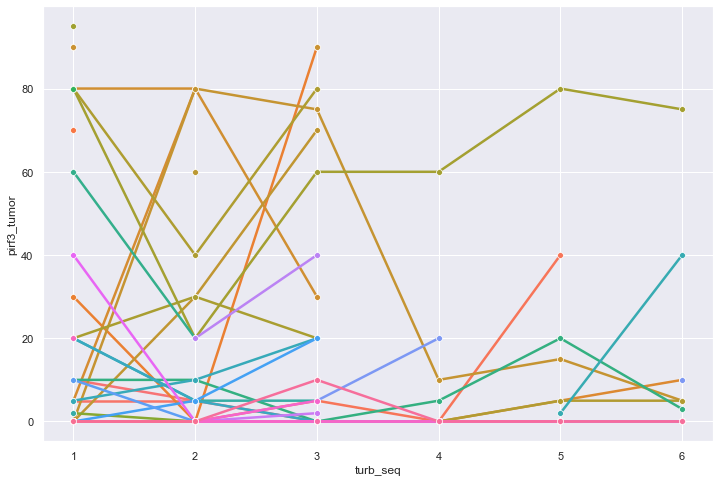

In [40]:
g = sns.lineplot(x='turb_seq', y=marker, hue='sp', data=df_no_bcg, legend=False, marker='o', linewidth=2.5)

In [41]:
# P value (Kruskal-Wallis test)
p = scipy.stats.kruskal(*[data[marker].values for name, data in df_no_bcg.groupby('turb_seq')], nan_policy='omit')[1]
print('P value = {:.1e}'.format(p))

P value = 6.8e-01


In [42]:
# Dunn's posthoc test
dunn = scikit_posthocs.posthoc_dunn([data[marker].values for name, data in df_no_bcg.groupby('turb_seq')]).round(5)
pd.DataFrame(np.array(dunn))

0        1        2        3        4        5
0  1.00000  0.61662  0.85840  0.61366  0.56131  0.91200
1  0.61662  1.00000  0.52213  0.85223  0.38843  0.66987
2  0.85840  0.52213  1.00000  0.54632  0.64393  0.99415
3  0.61366  0.85223  0.54632  1.00000  0.39914  0.62686
4  0.56131  0.38843  0.64393  0.39914  1.00000  0.69656
5  0.91200  0.66987  0.99415  0.62686  0.69656  1.00000

## pIRF3 in peritumoral lymphocytes

In [43]:
marker = 'pirf3_inflammatory'
tbl = df_no_bcg.groupby(['sp','turb_seq'])[marker].median().reset_index()
tbl.groupby('turb_seq')[marker].describe()

count       mean        std  min  25%  50%    75%    max
turb_seq                                                          
1          34.0  20.764706  29.414549  0.0  0.0  2.0  37.50  100.0
2          26.0  20.192308  32.746321  0.0  0.0  2.0  26.25  100.0
3          28.0  15.892857  29.377920  0.0  0.0  0.0  12.50  100.0
4          10.0   5.000000   9.357113  0.0  0.0  1.0   4.50   30.0
5           8.0   4.125000  10.507650  0.0  0.0  0.0   0.75   30.0
6           6.0  15.000000  31.937439  0.0  0.0  2.5   5.00   80.0

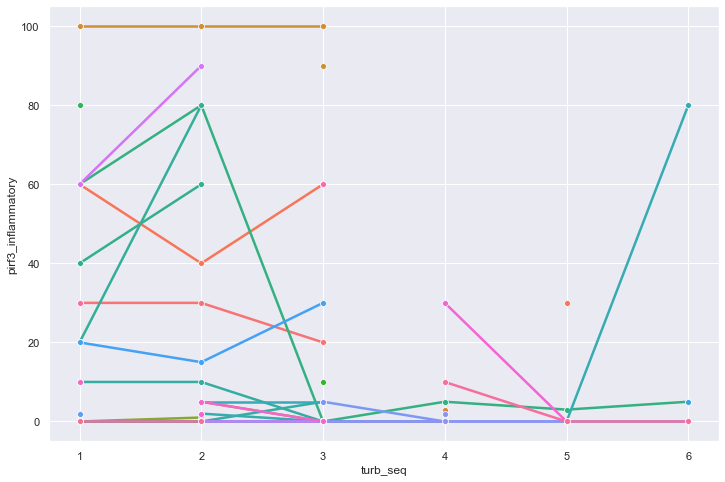

In [44]:
g = sns.lineplot(x='turb_seq', y=marker, hue='sp', data=df_no_bcg, legend=False, marker='o', linewidth=2.5)

In [45]:
# P value (Kruskal-Wallis test)
p = scipy.stats.kruskal(*[data[marker].values for name, data in df_no_bcg.groupby('turb_seq')], nan_policy='omit')[1]
print('P value = {:.1e}'.format(p))

P value = 5.6e-01


In [46]:
# Dunn's posthoc test
dunn = scikit_posthocs.posthoc_dunn([data[marker].values for name, data in df_no_bcg.groupby('turb_seq')]).round(5)
pd.DataFrame(np.array(dunn))

0        1        2        3        4        5
0  1.00000  0.97703  0.72993  0.77222  0.57588  0.90854
1  0.97703  1.00000  0.72557  0.76416  0.57393  0.89745
2  0.72993  0.72557  1.00000  0.96528  0.74247  0.93405
3  0.77222  0.76416  0.96528  1.00000  0.80731  0.91785
4  0.57588  0.57393  0.74247  0.80731  1.00000  0.75440
5  0.90854  0.89745  0.93405  0.91785  0.75440  1.00000